In [1]:
import pandas as pd

import pyEX as p

c = p.Client(api_token='Tpk_8b60e573f58844adb8026f0e6db6fd2b', version='sandbox')

spydf = c.chartDF('TWTR', timeframe='max')
spydf.head()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-13,40.75,43.00,40.220,40.60,TWTR,106050565,COIP_SSARTLHICERI,RTWT,,2023-07-02 04:10:13.166000128,...,40.980,105267990,41.10,42.48,43.00,41.880,104476191,"May 13, 22",0.000000,0.0000
2022-05-12,45.17,49.13,43.550,46.49,TWTR,38395225,TILOR_IRHCPSIASEC,TWRT,,2023-03-03 07:42:11.801999872,...,43.840,38169621,45.39,47.12,47.96,44.040,39520013,"May 12, 22",4.459023,0.1115
2022-05-11,47.53,49.22,47.100,49.06,TWTR,25082939,AISPHRLSITICORC_E,TWRT,,2023-02-24 04:34:09.748000000,...,46.400,25173837,48.22,47.49,48.18,47.500,25039651,"May 11, 22",1.016547,0.0226
2022-05-10,48.07,50.69,48.000,49.82,TWTR,24850340,CIIHRRAS_CEPLOTIS,RTTW,,2023-03-20 13:39:51.905999872,...,48.000,24746197,49.02,48.13,49.82,46.600,24619054,"May 10, 22",1.221595,0.0258
2022-05-09,48.68,50.10,48.475,50.10,TWTR,39150298,PSICE_AIRTSOCHRIL,WTRT,,2024-06-28 18:34:19.520999936,...,49.974,38335198,51.10,48.85,49.96,49.872,37787767,"May 9, 22",0.724113,0.0154


In [2]:
!pip install pyEX

You should consider upgrading via the '/Users/riyamanchanda/hft/hft/bin/python -m pip install --upgrade pip' command.


In [3]:
spydf = spydf.reindex(index=spydf.index[::-1])
spydf.reset_index(level=0, inplace=True)

In [4]:
spydf['date'] = pd.to_datetime(spydf['date'])

In [5]:
spydf['ma_20'] = spydf['close'].rolling(20).mean()
spydf['std'] = spydf['close'].rolling(20).std()

spydf['upper_bollinger'] = spydf['ma_20'] + (2 * spydf['std'])
spydf['lower_bollinger'] = spydf['ma_20'] - (2 * spydf['std'])

In [6]:
def gain(value):
    if value < 0:
        return 0
    else:
        return value

In [7]:
def loss(value):
    if value > 0:
        return 0
    else:
        return abs(value)

In [8]:
period = 6

spydf['delta'] = spydf['close'].diff()

spydf['gain'] = spydf['delta'].apply(lambda x:gain(x))
spydf['loss'] = spydf['delta'].apply(lambda x:loss(x))

spydf['ema_gain'] = spydf['gain'].ewm(period).mean()
spydf['ema_loss'] = spydf['loss'].ewm(period).mean()

spydf['rs'] = spydf['ema_gain']/spydf['ema_loss']
spydf['rsi'] = spydf['rs'].apply(lambda x: 100 - (100/(x+1)))

In [9]:
import numpy as np

spydf['signal'] = np.where(
    (spydf['rsi'] < 30) &
    (spydf['close'] < spydf['lower_bollinger']), 1, np.nan)

spydf['signal'] = np.where(
    (spydf['rsi'] > 70) &
    (spydf['close'] > spydf['upper_bollinger']), -1, spydf['signal'])

spydf['signal'] = spydf['signal'].shift()
spydf['signal'] = spydf['signal'].fillna(0)

In [10]:
import test as tst

tst.backtest_dataframe(spydf)

Buying at 55.57 on 2014-02-07 00:00:00
Selling at 37.6 on 2014-06-13 00:00:00
Buying at 44.04 on 2014-10-29 00:00:00
Selling at 48.29 on 2015-02-09 00:00:00
Buying at 39.2 on 2015-04-29 00:00:00
Selling at 37.35 on 2015-07-15 00:00:00
Buying at 31.5 on 2015-07-30 00:00:00
Selling at 32.18 on 2015-10-09 00:00:00
Buying at 22.86 on 2015-12-22 00:00:00
Selling at 15.31 on 2016-05-31 00:00:00
Buying at 16.95 on 2016-07-28 00:00:00
Selling at 20.9 on 2016-08-16 00:00:00
Buying at 16.6 on 2016-12-23 00:00:00
Selling at 17.71 on 2017-02-03 00:00:00
Buying at 14.58 on 2017-04-10 00:00:00
Selling at 17.24 on 2017-04-27 00:00:00
Buying at 16.71 on 2017-08-01 00:00:00
Selling at 18.9 on 2017-09-13 00:00:00
Buying at 24.42 on 2018-01-26 00:00:00
Selling at 27.65 on 2018-02-01 00:00:00
Buying at 29.6 on 2018-03-28 00:00:00
Selling at 33.5 on 2018-05-15 00:00:00
Buying at 32.54 on 2018-07-30 00:00:00
Selling at 33.23 on 2018-10-29 00:00:00
Buying at 27.98 on 2018-12-21 00:00:00
Selling at 36.04 on 2

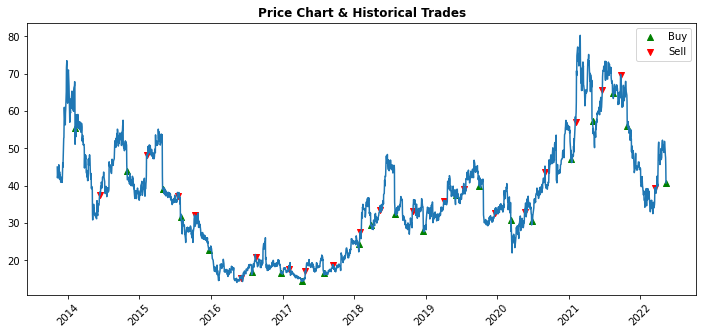

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)

plt.plot(spydf['date'], spydf['close'])
plt.scatter(spydf[(spydf['signal'] == 1)]['buy_date'], spydf[(spydf['signal'] == 1)]['close'], label = 'Buy', marker='^', c='g')
plt.scatter(spydf[(spydf['signal'] == -1)]['sell_date'], spydf[(spydf['signal'] == -1)]['close'], label = 'Sell', marker='v', c='r')

plt.title('Price Chart & Historical Trades', fontweight="bold")
plt.legend()
plt.show()